In [9]:
from keras import layers, models, Input, Model, callbacks
from keras.datasets import mnist
import keras
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE
from tqdm.notebook import tqdm
from tqdm.keras import TqdmCallback
import tensorflow as tf
import umap

In [12]:
# Load the MNIST dataset, scales values from [0, 255] to [0, 1] and flattens the 2D images (28x28 = 784)
(x_train, y_train), (x_test, y_test) = mnist.load_data()
xn_train = x_train.astype('float32') / 255.
xn_test = x_test.astype('float32') / 255.
xn_train = xn_train.reshape(x_train.shape[0], 784)
xn_test = xn_test.reshape(x_test.shape[0], 784)

In [5]:
input_img = Input(shape=(784,))
encoded = layers.Dense(500, activation='relu')(input_img)
encoded = layers.Dense(120, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)

decoded = layers.Dense(120, activation='relu')(encoded)
decoded = layers.Dense(500, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# es = callbacks.EarlyStopping(monitor='loss', mode='min', verbose=1, patience=1)
# autoencoder.fit(xn_train, xn_train, epochs=150, batch_size=256, shuffle=True,
#                 validation_data=(xn_test, xn_test), callbacks=[es,TqdmCallback(verbose=1)], verbose=0)

In [6]:
autoencoder.fit(xn_train, xn_train, epochs=150, batch_size=256, shuffle=True,
                validation_data=(xn_test, xn_test), callbacks=[TqdmCallback(verbose=1)], verbose=0)

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

In [7]:
autoencoder.save(f"standard_ae_32.h5")

In [9]:
decoded_imgs = autoencoder.predict(xn_test)

313/313 [==============================] - 1s 2ms/step


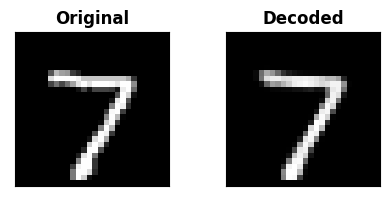

In [18]:
plt.figure(figsize=(5, 2))
ax = plt.subplot(1, 2, 1)
plt.imshow(xn_test[0].reshape(28,28), cmap="gray")
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_title(f"Original", fontweight="bold")
ax = plt.subplot(1, 2, 2)
plt.imshow(decoded_imgs[0].reshape(28,28), cmap="gray")
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_title(f"Decoded", fontweight="bold")
plt.show()

In [21]:
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_6 (Dense)             (None, 500)               392500    
                                                                 
 dense_7 (Dense)             (None, 120)               60120     
                                                                 
 dense_8 (Dense)             (None, 32)                3872      
                                                                 
 dense_9 (Dense)             (None, 120)               3960      
                                                                 
 dense_10 (Dense)            (None, 500)               60500     
                                                                 
 dense_11 (Dense)            (None, 784)               3927

In [25]:
encoder = Model(autoencoder.input, autoencoder.layers[3].output)
encoder.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_6 (Dense)             (None, 500)               392500    
                                                                 
 dense_7 (Dense)             (None, 120)               60120     
                                                                 
 dense_8 (Dense)             (None, 32)                3872      
                                                                 
Total params: 456,492
Trainable params: 456,492
Non-trainable params: 0
_________________________________________________________________


In [26]:
encoded_input = Input(shape=(32,))
deco = autoencoder.layers[-3](encoded_input)
deco = autoencoder.layers[-2](deco)
deco = autoencoder.layers[-1](deco)
decoder = Model(encoded_input, deco)
decoder.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 32)]              0         
                                                                 
 dense_9 (Dense)             (None, 120)               3960      
                                                                 
 dense_10 (Dense)            (None, 500)               60500     
                                                                 
 dense_11 (Dense)            (None, 784)               392784    
                                                                 
Total params: 457,244
Trainable params: 457,244
Non-trainable params: 0
_________________________________________________________________


In [27]:
# Compresse les 60 000 images de training
embeddings = encoder.predict(xn_train)

1875/1875 [==============================] - 2s 793us/step


In [29]:
embeddings.shape

(60000, 32)

# Visualisation latent space MNIST (latent dim = 2)

In [73]:
input_img = Input(shape=(784,))
encoded = layers.Dense(500, activation='relu')(input_img)
encoded = layers.Dense(120, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)
encoded = layers.Dense(2, activation='relu')(encoded)

decoded = layers.Dense(32, activation='relu')(encoded)
decoded = layers.Dense(120, activation='relu')(decoded)
decoded = layers.Dense(500, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)

autoencoder2 = Model(input_img, decoded)
autoencoder2.compile(optimizer='adam', loss='binary_crossentropy')

In [75]:
autoencoder2.fit(xn_train, xn_train, epochs=100, batch_size=256, shuffle=True,
                validation_data=(xn_test, xn_test), callbacks=[TqdmCallback(verbose=1)], verbose=0)

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

In [77]:
autoencoder2.save(f"standard_ae_2.h5")

In [76]:
autoencoder2.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_20 (Dense)            (None, 500)               392500    
                                                                 
 dense_21 (Dense)            (None, 120)               60120     
                                                                 
 dense_22 (Dense)            (None, 32)                3872      
                                                                 
 dense_23 (Dense)            (None, 2)                 66        
                                                                 
 dense_24 (Dense)            (None, 32)                96        
                                                                 
 dense_25 (Dense)            (None, 120)               3960

In [79]:
encoder = Model(autoencoder2.input, autoencoder2.layers[4].output)
encoder.summary()

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_20 (Dense)            (None, 500)               392500    
                                                                 
 dense_21 (Dense)            (None, 120)               60120     
                                                                 
 dense_22 (Dense)            (None, 32)                3872      
                                                                 
 dense_23 (Dense)            (None, 2)                 66        
                                                                 
Total params: 456,558
Trainable params: 456,558
Non-trainable params: 0
_________________________________________________________________


In [81]:
encoded_input = Input(shape=(2,))
deco = autoencoder2.layers[-4](encoded_input)
deco = autoencoder2.layers[-3](deco)
deco = autoencoder2.layers[-2](deco)
deco = autoencoder2.layers[-1](deco)
decoder = Model(encoded_input, deco)
decoder.summary()

Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 2)]               0         
                                                                 
 dense_24 (Dense)            (None, 32)                96        
                                                                 
 dense_25 (Dense)            (None, 120)               3960      
                                                                 
 dense_26 (Dense)            (None, 500)               60500     
                                                                 
 dense_27 (Dense)            (None, 784)               392784    
                                                                 
Total params: 457,340
Trainable params: 457,340
Non-trainable params: 0
_________________________________________________________________


In [96]:
embeddings = encoder.predict(xn_train)
embeddings.shape

1875/1875 [==============================] - 2s 907us/step


(60000, 2)

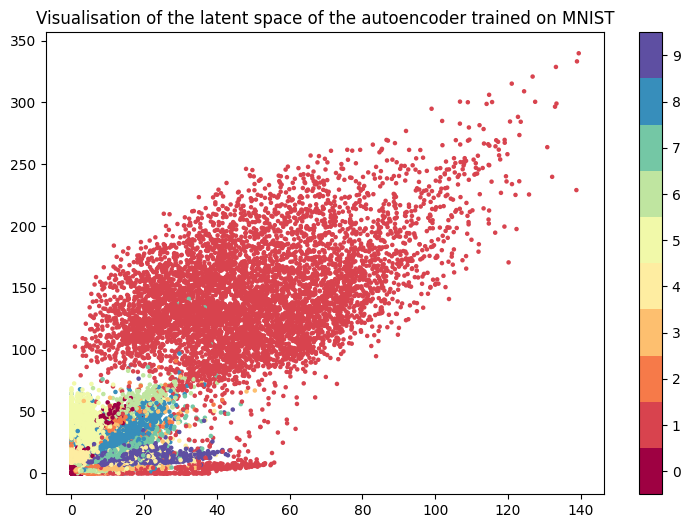

In [97]:
plt.figure(figsize=(9, 6))
plt.scatter(embeddings[:, 0], embeddings[:, 1], c=y_train, cmap='Spectral', s=5)
#plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('Visualisation of the latent space of the autoencoder trained on MNIST');

Trop bizarre cette énorme traînée pour le 1... <br>
Je test avec les dimensions là-dessus : https://github.com/gr-b/autoencoder-latent-space-visualization <br>
512 -> 128 -> 64 -> 2

In [99]:
bottleneck_size = 2
input_img = Input(shape=(784,))
encoded = layers.Dense(512, activation='relu')(input_img)
encoded = layers.Dense(128, activation='relu')(encoded)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(bottleneck_size, activation='linear')(encoded)
encoder = Model(input_img, encoded)

encoded_input = Input(shape=(bottleneck_size,))
decoded = layers.Dense(64, activation='relu')(encoded_input)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(512, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)
decoder = Model(encoded_input, decoded)

full = decoder(encoder(input_img))
ae = Model(input_img, full)
ae.compile(optimizer='adam', loss='mean_squared_error')

In [100]:
ae.fit(xn_train, xn_train, epochs=200, batch_size=256, shuffle=True,
                validation_data=(xn_test, xn_test), callbacks=[TqdmCallback(verbose=1)], verbose=0)

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

In [103]:
ae.save(f"ae.h5")

In [102]:
decoder.summary()

Model: "model_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 2)]               0         
                                                                 
 dense_32 (Dense)            (None, 64)                192       
                                                                 
 dense_33 (Dense)            (None, 128)               8320      
                                                                 
 dense_34 (Dense)            (None, 512)               66048     
                                                                 
 dense_35 (Dense)            (None, 784)               402192    
                                                                 
Total params: 476,752
Trainable params: 476,752
Non-trainable params: 0
_________________________________________________________________


In [104]:
embeddings = encoder.predict(xn_train)
embeddings.shape

1875/1875 [==============================] - 2s 879us/step


(60000, 2)

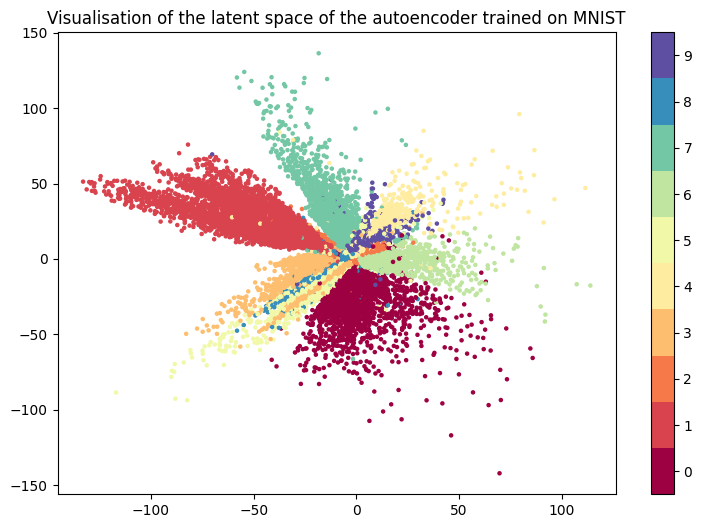

In [105]:
plt.figure(figsize=(9, 6))
plt.scatter(embeddings[:, 0], embeddings[:, 1], c=y_train, cmap='Spectral', s=5)
#plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('Visualisation of the latent space of the autoencoder trained on MNIST');

Mieux !

In [106]:
embeddings[0]

array([-6.1373205, -3.0099478], dtype=float32)

In [118]:
rec = decoder.predict(embeddings[0].reshape(1,-1))

1/1 [==============================] - 0s 14ms/step


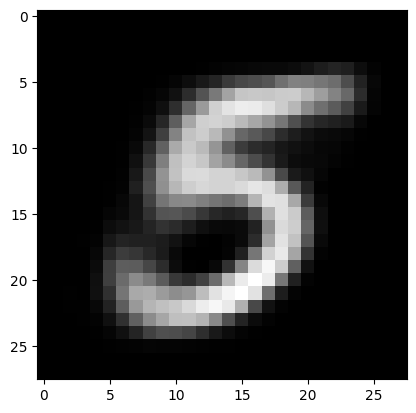

In [121]:
plt.imshow(rec.reshape(28,28), cmap="gray")

In [152]:
test = np.array([-100, 10])
rec = decoder.predict(test.reshape(1,-1))

1/1 [==============================] - 0s 16ms/step


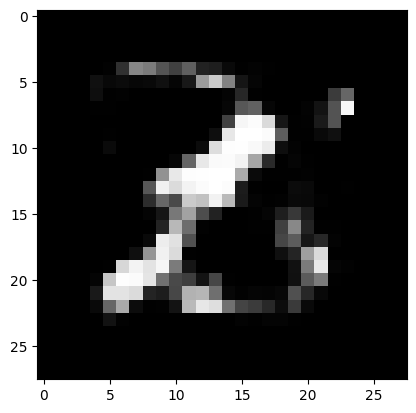

In [153]:
plt.imshow(rec.reshape(28,28), cmap="gray")

Pris un point à gauche sur mon graphe, dans la zone vide. Qd je prend un point non présent mais proche de ce qui existe, il arrive à me recréer un vrai chiffre, mais celui-ci ressemble à rien .. ou un mélange entre 3 et 1? <br>
Voir si je peux faire la même archi avec VAE et tester le même point (si ça a du sens)

In [156]:
test = np.array([0, 1000])
rec = decoder.predict(test.reshape(1,-1))

1/1 [==============================] - 0s 16ms/step


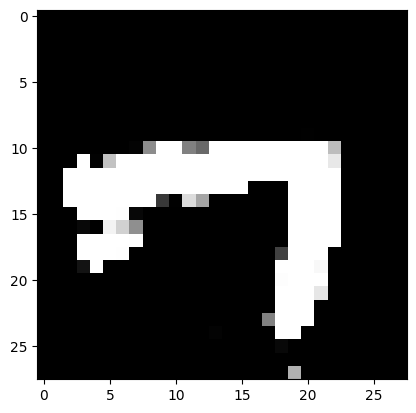

In [157]:
plt.imshow(rec.reshape(28,28), cmap="gray")

# VAE

In [3]:
class Sampling(layers.Layer):
    """Uses (z_mean, z_log_var) to sample z, the vector encoding a digit."""

    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

In [47]:
bottleneck_size = 2
input_img = Input(shape=(784,))
vencoded = layers.Dense(512, activation='relu')(input_img)
vencoded = layers.Dense(128, activation='relu')(vencoded)
vencoded = layers.Dense(64, activation='relu')(vencoded)
z_mean = layers.Dense(bottleneck_size, name="z_mean")(vencoded)
z_log_var = layers.Dense(bottleneck_size, name="z_log_var")(vencoded)
z = Sampling()([z_mean, z_log_var])
vencoder = Model(input_img, [z_mean, z_log_var, z], name="vencoder")

encoded_input = Input(shape=(bottleneck_size,), name='z_sampling')
vdecoded = layers.Dense(64, activation='relu')(encoded_input)
vdecoded = layers.Dense(128, activation='relu')(vdecoded)
vdecoded = layers.Dense(512, activation='relu')(vdecoded)
vdecoded = layers.Dense(784, activation='sigmoid')(vdecoded)
vdecoder = Model(encoded_input, vdecoded)

vfull = vdecoder(vencoder(input_img)[2])
vae = Model(input_img, vfull)
#vae.compile(optimizer='adam', loss='mean_squared_error')

In [48]:
vencoder.summary()

Model: "vencoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_20 (InputLayer)          [(None, 784)]        0           []                               
                                                                                                  
 dense_77 (Dense)               (None, 512)          401920      ['input_20[0][0]']               
                                                                                                  
 dense_78 (Dense)               (None, 128)          65664       ['dense_77[0][0]']               
                                                                                                  
 dense_79 (Dense)               (None, 64)           8256        ['dense_78[0][0]']               
                                                                                           

In [49]:
vdecoder.summary()

Model: "model_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 z_sampling (InputLayer)     [(None, 2)]               0         
                                                                 
 dense_80 (Dense)            (None, 64)                192       
                                                                 
 dense_81 (Dense)            (None, 128)               8320      
                                                                 
 dense_82 (Dense)            (None, 512)               66048     
                                                                 
 dense_83 (Dense)            (None, 784)               402192    
                                                                 
Total params: 476,752
Trainable params: 476,752
Non-trainable params: 0
_________________________________________________________________


In [50]:
vae.summary()

Model: "model_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_20 (InputLayer)       [(None, 784)]             0         
                                                                 
 vencoder (Functional)       [(None, 2),               476100    
                              (None, 2),                         
                              (None, 2)]                         
                                                                 
 model_22 (Functional)       (None, 784)               476752    
                                                                 
Total params: 952,852
Trainable params: 952,852
Non-trainable params: 0
_________________________________________________________________


In [51]:
reconstruction_loss = tf.reduce_mean(tf.reduce_sum(keras.losses.mean_squared_error(input_img, vfull)))
kl_loss = -0.5 * (1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
kl_loss = tf.reduce_mean(tf.reduce_sum(kl_loss, axis=1))
vae_loss = reconstruction_loss + kl_loss
vae.add_loss(vae_loss)
vae.compile(optimizer='adam')

In [52]:
vae.fit(xn_train, xn_train, epochs=200, batch_size=256, validation_data=(xn_test, xn_test),
        callbacks=[TqdmCallback(verbose=1)], verbose=0)

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

313/313 [==============================] - 1s 2ms/step


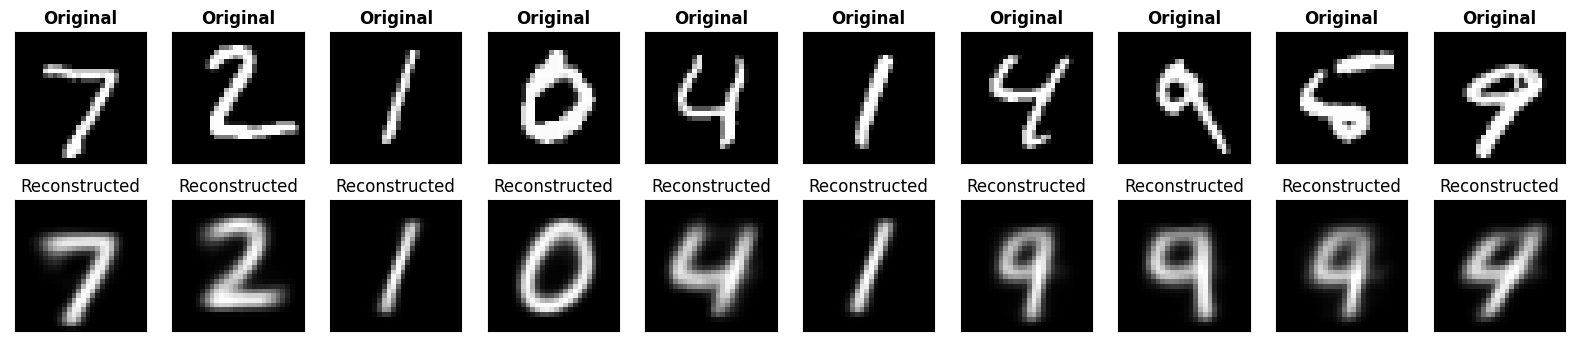

In [58]:
decoded_imgs = vae.predict(xn_test)
plt.figure(figsize=(20, 4))
number = 10
for i in range(number):
    ax = plt.subplot(2, number, i + 1)
    plt.imshow(x_test[i], cmap="gray")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title(f"Original", fontweight="bold")
    ax = plt.subplot(2, number, i + 1 + number)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap="gray")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title(f"Reconstructed")
plt.show()

313/313 [==============================] - 0s 1ms/step


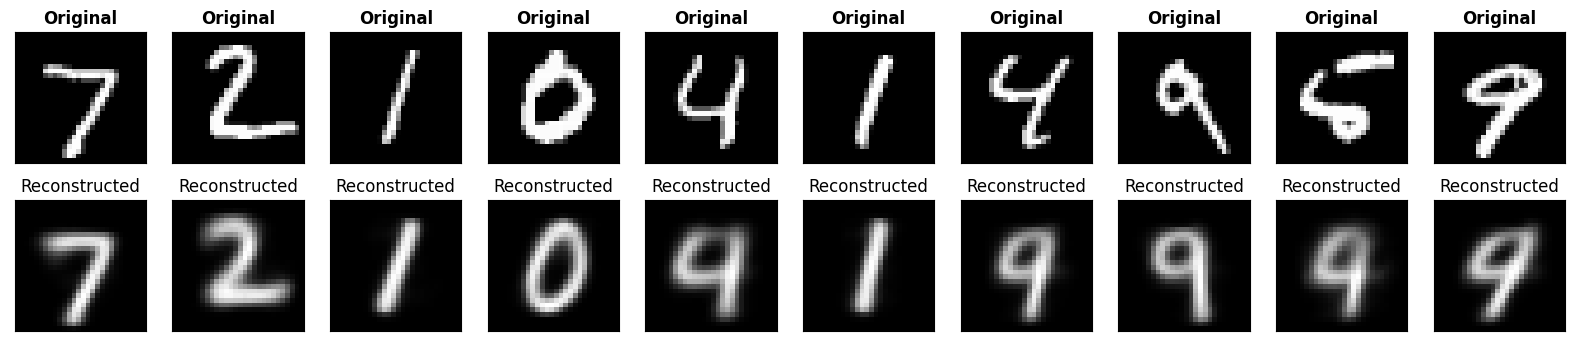

In [59]:
decoded_imgs = vae.predict(xn_test)
plt.figure(figsize=(20, 4))
number = 10
for i in range(number):
    ax = plt.subplot(2, number, i + 1)
    plt.imshow(x_test[i], cmap="gray")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title(f"Original", fontweight="bold")
    ax = plt.subplot(2, number, i + 1 + number)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap="gray")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title(f"Reconstructed")
plt.show()

313/313 [==============================] - 0s 1ms/step


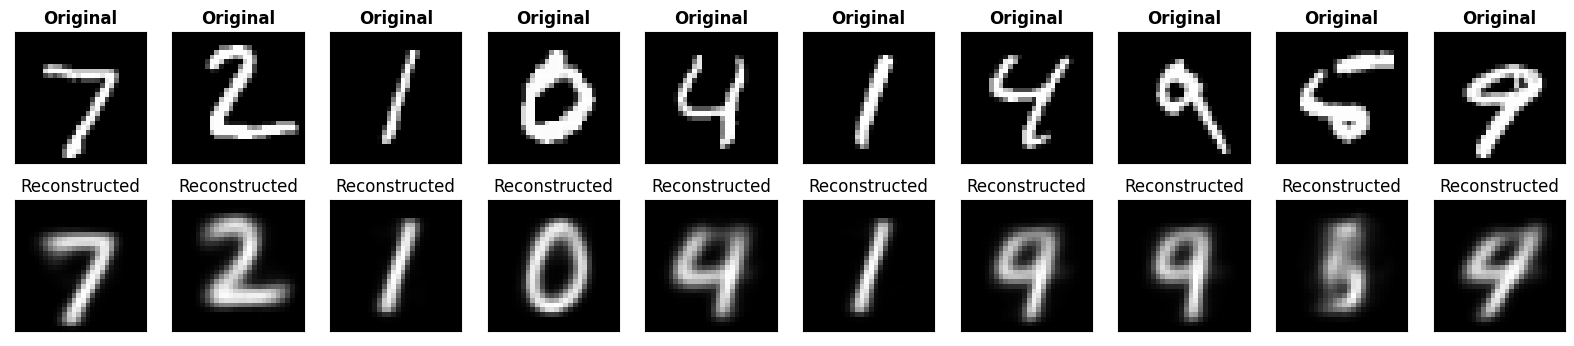

In [60]:
decoded_imgs = vae.predict(xn_test)
plt.figure(figsize=(20, 4))
number = 10
for i in range(number):
    ax = plt.subplot(2, number, i + 1)
    plt.imshow(x_test[i], cmap="gray")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title(f"Original", fontweight="bold")
    ax = plt.subplot(2, number, i + 1 + number)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap="gray")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title(f"Reconstructed")
plt.show()

313/313 [==============================] - 0s 2ms/step


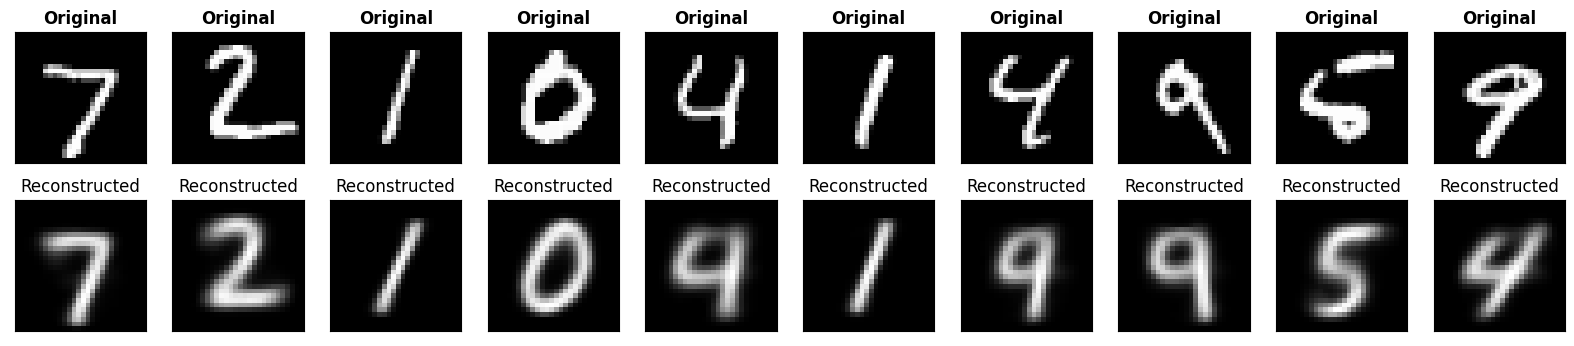

In [61]:
decoded_imgs = vae.predict(xn_test)
plt.figure(figsize=(20, 4))
number = 10
for i in range(number):
    ax = plt.subplot(2, number, i + 1)
    plt.imshow(x_test[i], cmap="gray")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title(f"Original", fontweight="bold")
    ax = plt.subplot(2, number, i + 1 + number)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap="gray")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title(f"Reconstructed")
plt.show()

In [70]:
vae.save(f"vae_2_mse.h5", save_format="tf")

In [64]:
embeddings = vencoder.predict(xn_train)
embeddings[2].shape

1875/1875 [==============================] - 2s 919us/step


(60000, 2)

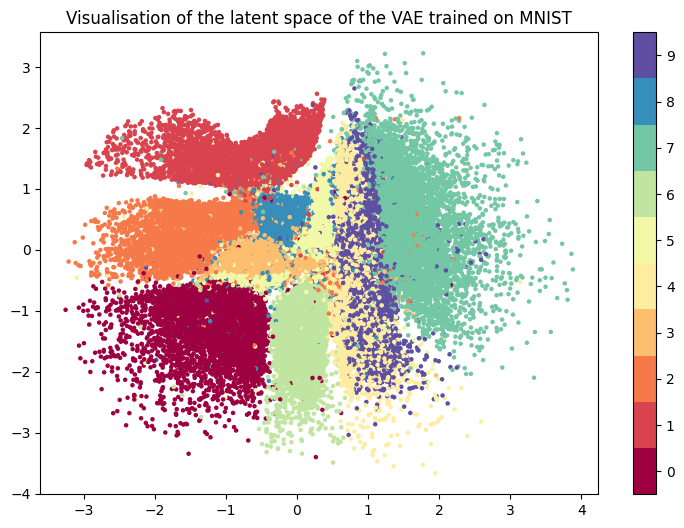

In [67]:
plt.figure(figsize=(9, 6))
plt.scatter(embeddings[0][:, 0], embeddings[0][:, 1], c=y_train, cmap='Spectral', s=5)
#plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('Visualisation of the latent space of the VAE trained on MNIST');

In [74]:
test = np.array([-100, 10])
rec = vdecoder.predict(test.reshape(1,-1))
rec.shape

1/1 [==============================] - 0s 17ms/step


(1, 784)

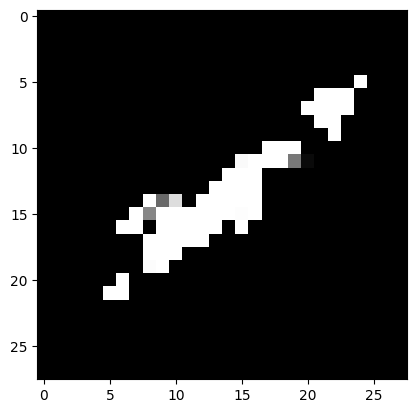

In [75]:
plt.imshow(rec.reshape(28,28), cmap='gray')

In [116]:
autoencoder = keras.models.load_model("ae.h5")
# encoded_input = Input(shape=(2,))
# deco = ae.layers[-4](encoded_input)
# deco = ae.layers[-3](deco)
# deco = ae.layers[-2](deco)
# deco = ae.layers[-1](deco)
# decoder = Model(encoded_input, deco)
# encoder = Model(ae.input, ae.layers[4].output)
# encoder.summary()
autoencoder.summary()

Model: "model_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 784)]             0         
                                                                 
 model_13 (Functional)       (None, 2)                 475970    
                                                                 
 model_14 (Functional)       (None, 784)               476752    
                                                                 
Total params: 952,722
Trainable params: 952,722
Non-trainable params: 0
_________________________________________________________________


In [81]:
embeddings = encoder.predict(xn_train)
vembeddings = vencoder.predict(xn_train)

1875/1875 [==============================] - 2s 852us/step


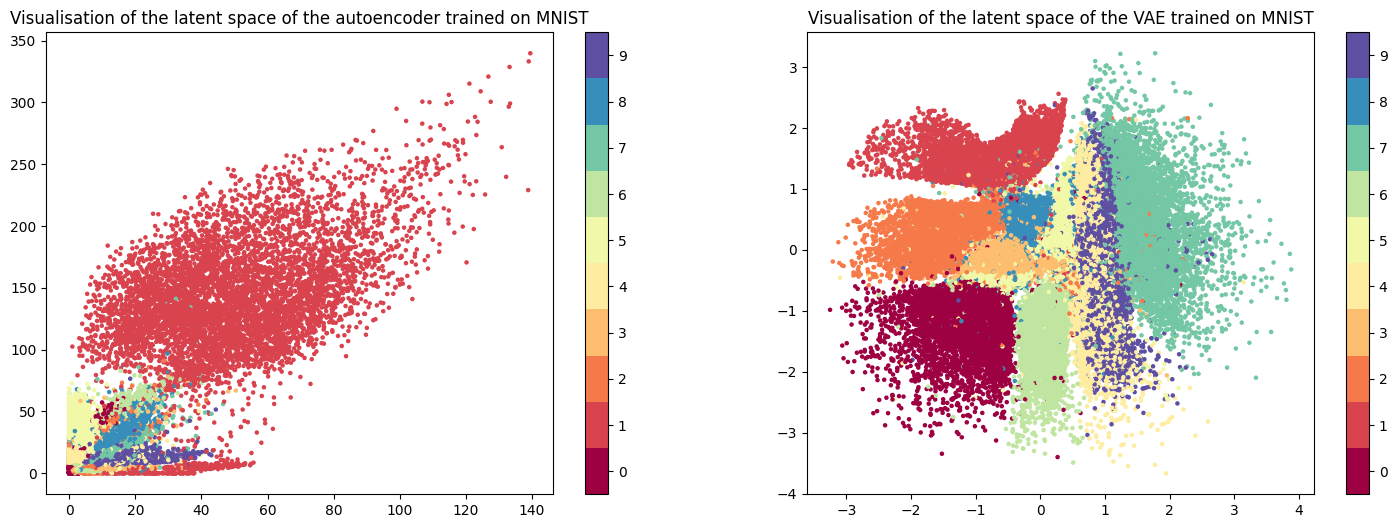

In [94]:
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
plt.scatter(embeddings[:, 0], embeddings[:, 1], c=y_train, cmap='Spectral', s=5)
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('Visualisation of the latent space of the autoencoder trained on MNIST')
plt.subplot(1, 2, 2)
plt.scatter(vembeddings[0][:, 0], vembeddings[0][:, 1], c=y_train, cmap='Spectral', s=5)
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('Visualisation of the latent space of the VAE trained on MNIST')
plt.show()

In [122]:
bottleneck_size = 2
input_img = Input(shape=(784,))
vencoded = layers.Dense(512, activation='relu')(input_img)
vencoded = layers.Dense(128, activation='relu')(vencoded)
vencoded = layers.Dense(64, activation='relu')(vencoded)
z_mean = layers.Dense(bottleneck_size, name="z_mean")(vencoded)
z_log_var = layers.Dense(bottleneck_size, name="z_log_var")(vencoded)
z = Sampling()([z_mean, z_log_var])
vencoder = Model(input_img, [z_mean, z_log_var, z], name="vencoder")

encoded_input = Input(shape=(bottleneck_size,), name='z_sampling')
vdecoded = layers.Dense(64, activation='relu')(encoded_input)
vdecoded = layers.Dense(128, activation='relu')(vdecoded)
vdecoded = layers.Dense(512, activation='relu')(vdecoded)
vdecoded = layers.Dense(784, activation='sigmoid')(vdecoded)
vdecoder = Model(encoded_input, vdecoded)

vfull = vdecoder(vencoder(input_img)[2])
vae2 = Model(input_img, vfull)

In [123]:
reconstruction_loss = tf.reduce_mean(tf.reduce_sum(keras.losses.mean_squared_error(input_img, vfull)))
# kl_loss = -0.5 * (1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
# kl_loss = tf.reduce_mean(tf.reduce_sum(kl_loss, axis=1))
vae_loss = reconstruction_loss
vae2.add_loss(vae_loss)
vae2.compile(optimizer='adam')

In [124]:
vae2.fit(xn_train, xn_train, epochs=200, batch_size=256, validation_data=(xn_test, xn_test),
        callbacks=[TqdmCallback(verbose=1)], verbose=0)

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

1875/1875 [==============================] - 2s 969us/step


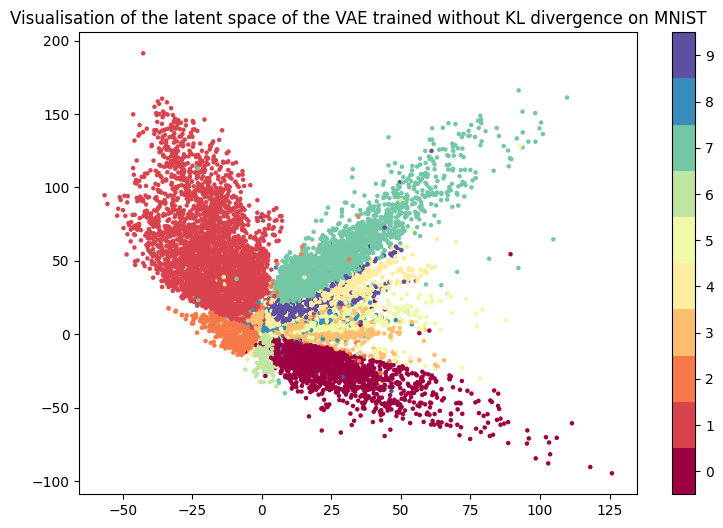

In [125]:
embeddings = vencoder.predict(xn_train)
plt.figure(figsize=(9, 6))
plt.scatter(embeddings[0][:, 0], embeddings[0][:, 1], c=y_train, cmap='Spectral', s=5)
#plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('Visualisation of the latent space of the VAE trained without KL divergence on MNIST');

In [141]:
np.mean(np.exp(0.5*embeddings[1]))

7.6780134e-07

In [142]:
np.mean(embeddings[0])

7.7819576

In [143]:
np.mean(embeddings[2])

7.7819576

In [126]:
vae2.save(f"vae_2_mse_noKL.h5", save_format="tf")